# Programming with Python

# 6 Reusing code with modules

## Distributing code across files and reusing it with modules
Assume that you want to reuse your four nice new functions in *another program*... You already guessed that copy/paste isn't the *clean* way to do this. The clean way, is the put the code to be reused into a separate file on the hard drive. Assume that this is the program you've written so far:

In [1]:
def get_col(lst_arg, index):
    return [ el[index] for el in lst_arg ]

def set_col(matrix, col, j):
    i = 0
    for line in matrix:
        line[j] = col[i]
        i = i + 1
    return matrix 

matrix = [
 [0.1, 0, 0],
 [0.2, 2, 19],
 [0.3, 3, 41],
 [0.4, 4, 76],
 [0.5, 5, 55],
 [0.6, 6, 43],
 [0.7, 7, 70],
 [0.8, 8, 81],
 [0.9, 9, 65]
]

col_one = get_col(matrix, 0)
matrix  = set_col(matrix, col_one, 1)
matrix  = set_col(matrix, col_one, 2)

See what this code does?<br />
Right, it gets col one and pastes it over col two and three (don't ask me why...):

In [2]:
matrix

[[0.1, 0.1, 0.1],
 [0.2, 0.2, 0.2],
 [0.3, 0.3, 0.3],
 [0.4, 0.4, 0.4],
 [0.5, 0.5, 0.5],
 [0.6, 0.6, 0.6],
 [0.7, 0.7, 0.7],
 [0.8, 0.8, 0.8],
 [0.9, 0.9, 0.9]]

Now, let's separate our programm into two separate files. We will call the file into which we put the actual program *main.py* and the file into which we put the matrix-related function *matrix_tools.py*:

![](./img/lecture06/modules01.png)

However, when we run *main.py*, we get the following result:

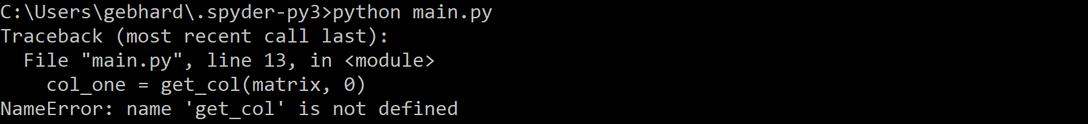

The reason for this error obviously is that the interpreter cannot find any *def get_col()* statement in *main.py* because we have moved this to *matrix_tools()*. We can solve this problem by explicitly telling the interpreter to **import** the content of another file, in this case of the *matrix_tools.py* file:

In [3]:
from matrix_tools import * 

matrix = [
 [0.1, 0, 0],
 [0.2, 2, 19],
 [0.3, 3, 41],
 [0.4, 4, 76],
 [0.5, 5, 55],
 [0.6, 6, 43],
 [0.7, 7, 70],
 [0.8, 8, 81],
 [0.9, 9, 65]
]

col_one = get_col(matrix, 0)
matrix  = set_col(matrix, col_one, 1)
matrix  = set_col(matrix, col_one, 2)
matrix

[[0.1, 0.1, 0.1],
 [0.2, 0.2, 0.2],
 [0.3, 0.3, 0.3],
 [0.4, 0.4, 0.4],
 [0.5, 0.5, 0.5],
 [0.6, 0.6, 0.6],
 [0.7, 0.7, 0.7],
 [0.8, 0.8, 0.8],
 [0.9, 0.9, 0.9]]

**On the nomenclature:**
A file that only contains functionalities (e.g. a collection of functions), custom data (e.g. data stored in variables), new custom data types etc., but no working program itself, is called a **module** in python.

Now, the first thing that python does is importing the content of *matrix_tools.py* into the current program.<br />
Please note, that:

* the file ending **must not** be given, i.e. if you want to import *example.py*, type **import example**
* import works like a keyword and not like a function, therefore do not put the file name into parenthesis
* as import is a keyword, the file name is no argument and does not need to be of type string

Ignoring these rules will cause errors:

In [4]:
from matrix_tools.py import *

ModuleNotFoundError: No module named 'matrix_tools.py'; 'matrix_tools' is not a package

See, how the compiler complains? *No module named 'matrix_tools.py'*. He doesn't say *no **file** named...* but says *no **module** named...*. That is because he expects us to provide a module name after an import statement. An module names do not have a file ending. It is a convention, that a module called *my_module* must be stored in a file called *my_module.py*.

In [ ]:
import(matrix_tools)

In [ ]:
import 'matrix_tools'

Furthermore, requesting non-existing files will raise an error:

In [ ]:
from some_nonexistent_file import *

Again, the compiler says, that he can't find a module called *some_nonexistent_file*.

In [5]:
from matrix_tools import * 

matrix = [
 [0.1, 0, 0],
 [0.2, 2, 19],
 [0.3, 3, 41],
 [0.4, 4, 76],
 [0.5, 5, 55],
 [0.6, 6, 43],
 [0.7, 7, 70],
 [0.8, 8, 81],
 [0.9, 9, 65]
]

col_one = get_col(matrix, 0)
matrix  = set_col(matrix, col_one, 1)
matrix  = set_col(matrix, col_one, 2)
matrix

[[0.1, 0.1, 0.1],
 [0.2, 0.2, 0.2],
 [0.3, 0.3, 0.3],
 [0.4, 0.4, 0.4],
 [0.5, 0.5, 0.5],
 [0.6, 0.6, 0.6],
 [0.7, 0.7, 0.7],
 [0.8, 0.8, 0.8],
 [0.9, 0.9, 0.9]]

In [6]:
def add(x,y):
    return x+y

add(1,1)

2

Now, let's create a module with a different add function which gives you a slightly different (and wrong!) result

![](./img/lecture06/modules02.png)

You can specify what function to be imported from the module

In [7]:
# subtract function was NOT importet 
from number_tools import add

subtract(1,1)

NameError: name 'subtract' is not defined

Using the import syntax makes the add function callable from the global namespace

In [8]:
from number_tools import add

add(1,1)

3

Beware to import modules with function name that already exists in your code (function overloading). 
To prevent that, you can create your own namespace for the imported modules:  
To do that, use following syntax:

In [9]:
import number_tools

print(number_tools.add(1,1))
print(add(1,1))

3
3


In [10]:
%reset # resets the kernel
def add(x,y):
    return x+y

import number_tools


print(add(1,1))

print(number_tools.add(1,1))

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.
2
3


In [11]:
# you can also create your own name space identifier
import number_tools as nt

nt.add(1,1)

3

In [12]:
%reset
def add(x,y):
    return x+y

from number_tools import add as add_error
print(add(1,1))
print(add_error(1,1))

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.
2
3


## Module search paths

Now, we want to import a module from a subfolder:

![](./img/lecture06/modules03.png)

The module won't be imported, because the interpreter doesn't know **where to find** your modules

In [13]:
import stupid_math

ModuleNotFoundError: No module named 'stupid_math'

In [14]:
import modules/stupid_math/stupid_math

SyntaxError: invalid syntax (<ipython-input-14-a631598d3265>, line 1)

Python stores an internal list of paths where it looks for modules. However, this list isn't in the global namespace when the compiler is started and thus, we cannot directly access it. In order to do so, we must import the sys module. The module path list can then be accessed by:

In [ ]:
import sys
sys.path

Now, you can add the folder location of your module:

In [15]:
sys.path.append('./modules/stupid_math')
sys.path

NameError: name 'sys' is not defined

The module is now importable:

In [16]:
import stupid_math
stupid_math.multiply(4,4)

ModuleNotFoundError: No module named 'stupid_math'